In [3]:
# Import aller wichtigen Bibliotheken für das Projekt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

C:\Users\dasil\AppData\Local\Temp\ipykernel_13328\625356645.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datum["Datum"] = pd.to_datetime(datum["Datum"], format="%d.%m.%Y", dayfirst=True)
C:\Users\dasil\AppData\Local\Temp\ipykernel_13328\625356645.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datum["Anfang"] = pd.to_datetime(datum["Anfang"], format="%H:%M")
C:\Users\dasil\AppData\Local\Temp\ipykernel_13328\625356645.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Epoch 1/10
670/670 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
670/670 [==============================] - 2s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
670/670 [==============================] - 2s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
670/670 [==============================] - 2s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
670/670 [==============================] - 2s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
670/670 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 7/10
670/670 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 8/10
670/670 [==============================] - 2s 3ms/step - loss: nan - val_loss: nan
Epoch 9/10
670/670 [==============================] - 2s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
837/837 [==============================] - 2s 2ms/step


C:\Users\dasil\AppData\Local\Temp\ipykernel_13328\625356645.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datum["Datum"] = pd.to_datetime(datum["Datum"], format="%d.%m.%Y", dayfirst=True)
C:\Users\dasil\AppData\Local\Temp\ipykernel_13328\625356645.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datum["Anfang"] = pd.to_datetime(datum["Anfang"], format="%H:%M")
C:\Users\dasil\AppData\Local\Temp\ipykernel_13328\625356645.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

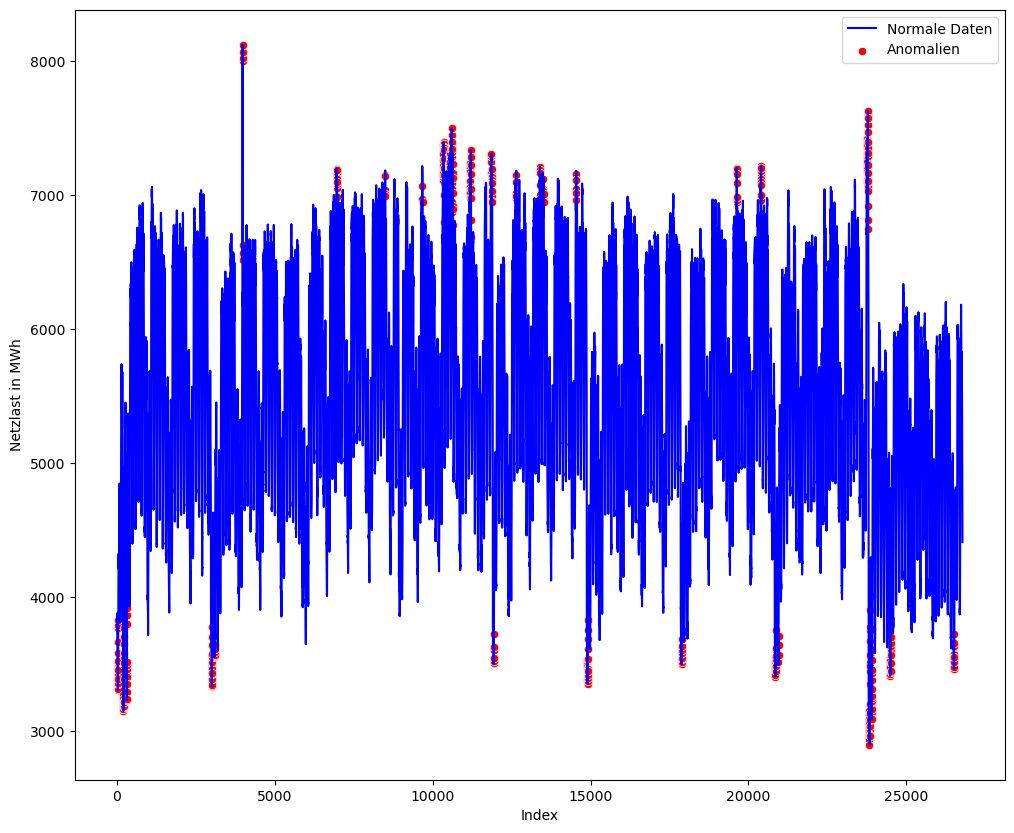

Entscheidungsbaum:
Genauigkeit (Accuracy): 0.9983198924731183
Klassifikationsbericht:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2867
           1       0.71      0.62      0.67         8
           2       1.00      1.00      1.00       101

    accuracy                           1.00      2976
   macro avg       0.90      0.87      0.89      2976
weighted avg       1.00      1.00      1.00      2976

Konfusionsmatrix:
[[2865    2    0]
 [   3    5    0]
 [   0    0  101]]


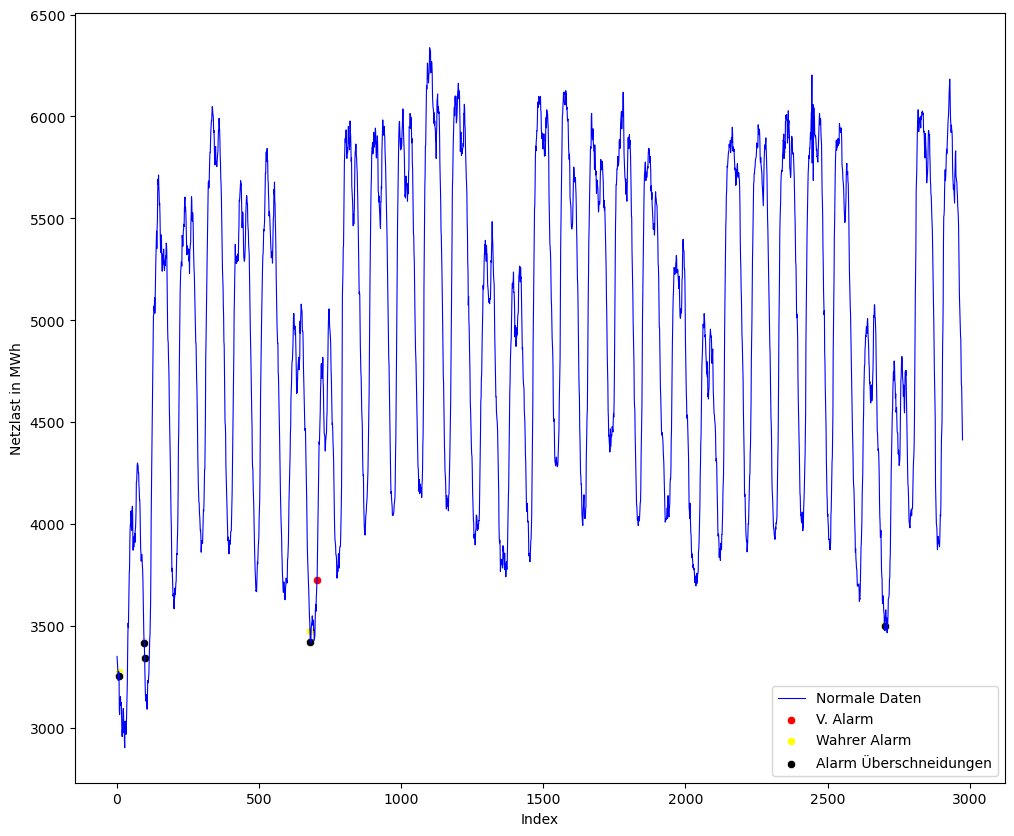

In [4]:
# Laden der der Datensätze für die Januarmonate 2015-2023
januar15=pd.read_csv("Realisierter_Stromverbrauch_201501010000_201501312359_Viertelstunde.csv", delimiter=";")
januar16=pd.read_csv("Realisierter_Stromverbrauch_201601010000_201601312359_Viertelstunde.csv", delimiter=";")
januar17=pd.read_csv("Realisierter_Stromverbrauch_201701010000_201701312359_Viertelstunde.csv", delimiter=";")
januar18=pd.read_csv("Realisierter_Stromverbrauch_201801010000_201801312359_Viertelstunde.csv", delimiter=";")
januar19=pd.read_csv("Realisierter_Stromverbrauch_201901010000_201901312359_Viertelstunde.csv", delimiter=";")
januar20=pd.read_csv("Realisierter_Stromverbrauch_202001010000_202001312359_Viertelstunde.csv", delimiter=";")
januar21=pd.read_csv("Realisierter_Stromverbrauch_202101010000_202101312359_Viertelstunde.csv", delimiter=";")
januar22=pd.read_csv("Realisierter_Stromverbrauch_202201010000_202201312359_Viertelstunde.csv", delimiter=";")
januar23=pd.read_csv("Realisierter_Stromverbrauch_202301010000_202301312359_Viertelstunde.csv", delimiter=";")

# Kombinieren der Datensätze zu einem gemeinsamen
januar_strom=pd.concat([januar15, januar16, januar17, januar18, januar19, januar20, januar21, januar22, januar23])

# Funktion, um das Zeitformat in verschiedene Spalten zu bekommen
# Gleitender Durchschnitt & Differenz der Strommengen werden hinzugefügt
def Zeitformat(MWh, df):
    
    # Nur bestimmte Spalten auswählen und das Format bestimmen
    datum=df[["Datum", "Anfang", MWh]]
    datum["Datum"] = pd.to_datetime(datum["Datum"], format="%d.%m.%Y", dayfirst=True)
    datum["Anfang"] = pd.to_datetime(datum["Anfang"], format="%H:%M")

    # Spalten kombinieren
    datum["Datum"] = datum["Datum"].dt.strftime("%d.%m.%Y") + " " + datum["Anfang"].dt.strftime("%H:%M")

    # Auf die wichtigen Spalten begrenzen
    datum = datum[["Datum", "Anfang", MWh]]
    datum.reset_index(drop=True, inplace=True)
    
    # Letzte Umwandlung der Datumspalte
    datum["Datum"] = pd.to_datetime(datum["Datum"], format="%d.%m.%Y %H:%M")
    
    # Umwandlung der Zahlen, sodass die Kommas richtig erkannt werden
    datum[MWh] = datum[MWh].str.replace('.', '')
    datum[MWh] = datum[MWh].str.replace(',', '.')
    
    # Umwanldung von String zu Float
    datum[MWh] = datum[MWh].astype(float)
    
        # Datum in mehrere Spalten aufteilen für die Prognosemodelle
    datum["Jahr"] = datum["Datum"].dt.year
    datum["Monat"] = datum["Datum"].dt.month
    datum["Tag"] = datum["Datum"].dt.day
    datum["Stunde"] = datum["Datum"].dt.hour
    datum["Minute"] = datum["Datum"].dt.minute
    
    # Gleitender Durchschnitt & Differenz der Strommengen hinzufügen
    datum['Gleitender_Durchschnitt'] = datum['Gesamt (Netzlast) [MWh] Originalauflösungen'].rolling(window=10, min_periods=1).mean()
    datum['Differenz_Strommenge1'] = datum['Gesamt (Netzlast) [MWh] Originalauflösungen'].diff()

    # Ausgabe der Datei
    return datum

datum=Zeitformat("Gesamt (Netzlast) [MWh] Originalauflösungen", januar_strom)

# Funktion für das künstliche neuronale Netzwerk
# Anomalien werden ahand des Rekonstruktionsfehlers und einer Schwelle des Perzentils bestimmt
def knn_anomalien(df):    
    # Den ganzen Datensatz zum Training nutzen
    x_train = df.drop(["Datum", "Anfang", "Gesamt (Netzlast) [MWh] Originalauflösungen"], axis=1)
    
    # Anzahl der Spalten im Datensatz wird gespeichert
    input_dim = len(x_train.columns)
    
    # Anzahl der Neuronen im Hidden-Layer wird festgelegt
    encoding_dim = 32

    # Eingeschicht und Codierungsschichten mit Anzahl der Neuronen und den Aktivierungsfunktionen
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    # Einstellung des Autoencoders und Encoders
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    # Definitionen des Decoders
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    
    # Kompilieren des Autoencoders mit Adam als Optimierer und dem MSE als Verlustfunktion
    autoencoder.compile(optimizer='adam', loss='mse')

    # Training des KNN mit 10 Iterationen und einem Validation Split von 20 Prozent
    autoencoder.fit(x_train, x_train,
                    epochs=10,
                    shuffle=False,
                    validation_split=0.2)

    # Rekonstruktionsfehler bestimmen
    Rekonstruktionsfehler = np.mean(np.power(x_train - autoencoder.predict(x_train), 2), axis=1)

    # Grenzwerte für den Rekonstruktionsfehler nach Perzentilen bestimmen
    grenzwert_hoch = np.percentile(Rekonstruktionsfehler, 99)
    grenzwert_niedrig = np.percentile(Rekonstruktionsfehler, 1)


    # Classify data points as anomalies based on the thresholds
    anomalies = (Rekonstruktionsfehler > grenzwert_hoch) | (Rekonstruktionsfehler < grenzwert_niedrig)
    
    # 0: Normale Werte; 2: Anomalien bzw. Probleme in den Daten
    df['Anomalie'] = np.where(anomalies, 2, 0)

    # Alle Informationen kombinieren
    datu = Zeitformat("Gesamt (Netzlast) [MWh] Originalauflösungen", januar_strom)
    df_alarm = pd.merge(df, datu, on=['Jahr', 'Monat', "Tag", "Stunde", "Minute"], how="right")
    
    # Datei mit den wichtigen Variablen definieren
    df_alarm["Alarm"] = df_alarm["Anomalie"]
    df_alarm = df_alarm[2:]
    df_alarm = df_alarm[['Jahr', 'Monat', 'Tag',
       'Stunde', 'Minute', 'Datum_y', 'Anfang_y',
       'Gesamt (Netzlast) [MWh] Originalauflösungen_y', "Alarm", "Gleitender_Durchschnitt_y"]]

    # Ausgabe der Datei
    return df_alarm

df_alarm = knn_anomalien(datum)

# Plot der Stromwerte. In rot werden die Probleme angezeigt, in gelb die Warnungen.
def visualisierung(df):
    # Problem und Warnungen kategorisch bestimmen für den Plot
    df_problem = df[df["Alarm"] == 2]
    
    # PLotten der Daten
    plt.figure(figsize=(12, 10))
    sns.lineplot(data=df_alarm, x=df_alarm.index, y="Gesamt (Netzlast) [MWh] Originalauflösungen_y", label="Normale Daten", color="blue")
    sns.scatterplot(data=df_problem, x=df_problem.index, y="Gesamt (Netzlast) [MWh] Originalauflösungen_y", label="Anomalien", color="red")
    plt.xlabel("Index")
    plt.ylabel("Netzlast in MWh")
    plt.legend()
    plt.show()
    
anomalien_vis=visualisierung(df_alarm)

# Eine funktion mit einer Schleife, um die Klasse 1 hinzuzufügen. 1 sind Alarme, die frühzeitig vor der Klasse 2 (Problemen) aufmerksam machen sollen.
# Funktion bekommt df_alarm und eine Zahl. 1: Alarm wird mit 2 Zeiteinheiten erstellt, also 30 Minuten vor dem Problem. 2: 16 Zeiteinheiten vor dem problem erscheinen die Warnungen, also 4 Stunden zuvor.
def neu_alarme(df_alarm, Zahl):
    if Zahl == 1:
        for index, row in df_alarm.iterrows():
            if index < len(df_alarm) - 2:
                if row['Alarm'] == 0 and (df_alarm.at[index + 1, 'Alarm'] == 2 or df_alarm.at[index + 2, 'Alarm'] == 2):
                    df_alarm.at[index, 'Alarm'] = 1                    
    elif Zahl == 2:
        for index, row in df_alarm.iterrows():
            if index < len(df_alarm) - 16:
                if row['Alarm'] == 0 and (df_alarm.at[index + 1, 'Alarm'] == 2 or df_alarm.at[index + 2, 'Alarm'] == 2 or df_alarm.at[index + 3, 'Alarm'] == 2 or df_alarm.at[index + 4, 'Alarm'] == 2 or df_alarm.at[index + 5, 'Alarm'] == 2 or df_alarm.at[index + 6, 'Alarm'] == 2 or df_alarm.at[index + 7, 'Alarm'] == 2 or df_alarm.at[index + 8, 'Alarm'] == 2 or df_alarm.at[index + 9, 'Alarm'] == 2 or df_alarm.at[index + 10, 'Alarm'] == 2 or df_alarm.at[index + 11, 'Alarm'] == 2 or df_alarm.at[index + 12, 'Alarm'] == 2 or df_alarm.at[index + 13, 'Alarm'] == 2 or df_alarm.at[index + 14, 'Alarm'] == 2 or df_alarm.at[index + 15, 'Alarm'] == 2 or df_alarm.at[index + 16, 'Alarm'] == 2):
                    df_alarm.at[index, 'Alarm'] = 1
    else:
        pass
    
    # Ausgabe der Datei
    return df_alarm

df_alarm = neu_alarme(df_alarm, 1)

# Kontrolle wie viele Klasse 1 Werte (Alarme) generiert wurden
df_alarm["Alarm"].value_counts()

# Funktion des Früherkennungssystems mit einem Entscheidungsbaum
# Erhält die Datei df_alarm und einer Zeit mit "validierung" für den Validierungszeitraum Januar 2022 und "test" für den Testzeitraum für Januar 2023.
def alarm(df_alarm, Zeit):
    
    # Zeiträume werden über eine if-Bedingung definiert
    if Zeit == "validierung":
        Z1 = 20830
        Z2 = 23806
    elif Zeit == "test":
        Z1 = 23806
        Z2 = len(df_alarm)
    else:
        pass
    
    # Aufteilung in Trainings- und Testdaten an die Zeiten geknüpft
    X_train = df_alarm.drop(['Alarm', "Datum_y", "Anfang_y"], axis=1)[:Z1]
    X_test = df_alarm.drop(['Alarm', "Datum_y", "Anfang_y"], axis=1)[Z1:Z2]
    y_train = df_alarm['Alarm'][:Z1]
    y_test = df_alarm['Alarm'][Z1:Z2]


    # Entscheidungsbaum-Modell mit festen Misch-Muster, damit es replizierbar ist
    Entscheidungsbaum = DecisionTreeClassifier(random_state=42)
    Entscheidungsbaum.fit(X_train, y_train)
    y_predict = Entscheidungsbaum.predict(X_test)

    # Auswertung des Entscheidungsbaum-Modells
    genauigkeit_gesamt = accuracy_score(y_test, y_predict)
    klassifikationsbericht = classification_report(y_test, y_predict)
    konfusionsmatrix = confusion_matrix(y_test, y_predict)

    # Ausgabe des Klassifikationsberichts und der Konfusionsmatrix
    print("Entscheidungsbaum:")
    print("Genauigkeit (Accuracy):", genauigkeit_gesamt)
    print("Klassifikationsbericht:\n", klassifikationsbericht)
    print("Konfusionsmatrix:")
    print(konfusionsmatrix)
    
    # Erstellung einer neuen Datei, für den späteren Plot
    y_predict = pd.DataFrame(y_predict)
    y_predict = y_predict.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    ergebnis = X_test.merge(y_test, left_index=True, right_index=True).merge(y_predict, left_index=True, right_index=True)
    
    return ergebnis

ergebnis = alarm(df_alarm, "test")

# Zweite Visualisierung, um die Validierungs- und Testzeiträume einzusehen und evaluieren zu können. Die Zeiträume werden vom Entscheidungsbaum übernommen.
# Zahl definiert mit 1 die Warnungen und mit 2 die Probleme, die im Plot ausgegeben werden
def visualisierung2(data, Zahl):
    # Problem und Warnungen bestimmen
    df_predict = data[data[0] == Zahl]
    df_true = data[data["Alarm"] == Zahl]
    
    # df_both gibt die Überschneidungen als dritte Farbe an, damit diese leichter im Plot zu erkennen sind
    df_both = data[(data["Alarm"] == Zahl) & (data[0] == Zahl)]
    
    # PLotten der Daten mit der Prognose in rot, den wahren Werten in gelb und den Überschneidungen beider Werte in schwarz
    plt.figure(figsize=(12, 10))
    sns.lineplot(data=data, x=data.index, y="Gesamt (Netzlast) [MWh] Originalauflösungen_y", label="Normale Daten", color="blue", linewidth=0.8)
    sns.scatterplot(data=df_predict, x=df_predict.index, y="Gesamt (Netzlast) [MWh] Originalauflösungen_y", label="V. Alarm", color="red")
    sns.scatterplot(data=df_true, x=df_true.index, y="Gesamt (Netzlast) [MWh] Originalauflösungen_y", label="Wahrer Alarm", color="yellow")
    sns.scatterplot(data=df_both, x=df_both.index, y="Gesamt (Netzlast) [MWh] Originalauflösungen_y", label="Alarm Überschneidungen", color="black")
    plt.xlabel("Index")
    plt.ylabel("Netzlast in MWh")
    plt.legend()
    plt.show()
    
visualisierung2(ergebnis, 1)
